# House Price Analysis

Manasa Gonuguntla
02/02/2023

In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [12]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

Data = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

Data.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [14]:
Data.duplicated().any()

True

In [15]:
Updated_Data= Data.drop_duplicates()

In [18]:
Updated_Data['Central Air'].replace(['Y', 'N'],
                        [1, 0], inplace=True)

In [19]:
Updated_Data['Central Air'].value_counts()

1    2725
0     195
Name: Central Air, dtype: int64

In [34]:
Updated_Data.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [35]:
Updated_Data['Total Bsmt SF']=Updated_Data['Total Bsmt SF'].fillna(Updated_Data['Total Bsmt SF'].mean())

In [36]:
Updated_Data.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [37]:
Updated_Data.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [38]:
X = Updated_Data.drop('SalePrice', axis=1)
y = Updated_Data['SalePrice']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
scaler = MinMaxScaler()

In [41]:
#scale our data
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
#now scale xtest using the same scaler
x_test_scaled = scaler.transform(x_test)

In [43]:
x_train_scaled[0]

array([0.77777778, 0.5       , 0.20621931, 1.        , 0.17972871])

In [79]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
Model_LR = LinearRegression( n_jobs=-1)
Model_LR.fit(x_train_scaled,y_train)
y_pred_LR = Model_LR.predict(x_test_scaled)

print("Training R-Squared: ",round( Model_LR.score(x_train_scaled, y_train),6))
print("Test R-Squared: ", round(Model_LR.score(x_test_scaled, y_test),6))
R_squared_LR = Model_LR.score(x_test_scaled, y_test)
MSE_LR = round(mean_squared_error(y_test, y_pred_LR),6)
MAE_LR = round(mean_absolute_error(y_test, y_pred_LR),6)
RMSE_LR = round(np.sqrt(MSE_LR),6)
print("Mean Absolute Error: ", MAE_LR)
print("Root mean suared error: ", RMSE_LR)
pickle.dump(Model_LR, open('Housing_LR.pkl', 'wb'))
#pickled_model_LR = pickle.load(open('Housing_LR.pkl', 'rb'))


Training R-Squared:  0.754562
Test R-Squared:  0.80081
Mean Absolute Error:  25820.620839
Root mean suared error:  36832.398401


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
Model_Lasso = linear_model.Lasso(random_state=0,selection='random')
param_grid = [    
    {'alpha':[0.3,0.5,0.7,0.9,1.0,10,50,100],
    'max_iter' : [2000,5000]
    }
]
grid = GridSearchCV(Model_Lasso, param_grid, cv =10,n_jobs=-1)
%time grid.fit(x_train_scaled, y_train)
print(grid.best_params_)
bestModel_Lasso = grid.best_estimator_
pickle.dump(bestModel_Lasso, open('Housing_Lasso.pkl', 'wb'))
pickled_model_LP = pickle.load(open('Housing_Lasso.pkl', 'rb'))


Wall time: 127 ms
{'alpha': 50, 'max_iter': 2000}


In [84]:
y_pred_Lasso = bestModel_Lasso.predict(x_test_scaled)
R_squared_Lasso = round(bestModel_Lasso.score(x_test_scaled, y_test), 6)
print("Training R-Squared: ", round(bestModel_Lasso.score(x_train_scaled, y_train),6))
print("Test R-Squared: ", R_squared_Lasso)
MSE_Lasso = round(mean_squared_error(y_test, y_pred_Lasso),6)
MAE_Lasso = round(mean_absolute_error(y_test, y_pred_Lasso),6)
RMSE_Lasso = round(np.sqrt(MSE_Lasso),6)
print("Mean Absolute Error: ", MAE_Lasso)
print("Root mean suared error: ", RMSE_Lasso)

Training R-Squared:  0.754431
Test R-Squared:  0.799142
Mean Absolute Error:  25865.446136
Root mean suared error:  36986.340108


In [87]:
Model_Ridge = linear_model.Ridge(random_state=0)
param_grid = [    
    {'alpha':[0.3,0.5,0.7,0.9,1.0,10,50,100],
     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
    }
]
grid = GridSearchCV(Model_Ridge, param_grid, cv =10,n_jobs=-1)
%time grid.fit(x_train_scaled, y_train)
print(grid.best_params_)
bestModel_Ridge = grid.best_estimator_
pickle.dump(bestModel_Ridge, open('Housing_Ridge.pkl', 'wb'))
#pickled_model_Ridge = pickle.load(open('Housing_Ridge.pkl', 'rb'))


Wall time: 2.01 s
{'alpha': 1.0, 'solver': 'sparse_cg'}


In [88]:
y_pred_Ridge = bestModel_Ridge.predict(x_test_scaled)
R_squared_Ridge = round(bestModel_Ridge.score(x_test_scaled, y_test), 6)
print("Training R-Squared: ", round(bestModel_Ridge.score(x_train_scaled, y_train),6))
print("Test R-Squared: ", R_squared_Ridge)
MSE_Ridge = round(mean_squared_error(y_test, y_pred_Ridge),6)
MAE_Ridge = round(mean_absolute_error(y_test, y_pred_Ridge),6)
RMSE_Ridge = round(np.sqrt(MSE_Ridge),6)
print("Mean Absolute Error: ", MAE_Ridge)
print("Root mean suared error: ", RMSE_Ridge)

Training R-Squared:  0.75421
Test R-Squared:  0.797207
Mean Absolute Error:  25892.340911
Root mean suared error:  37163.987241


In [92]:
from sklearn.ensemble import RandomForestRegressor
Model_RandomForest = RandomForestRegressor(random_state=0, n_jobs=-1)
param_grid = [    
    {'n_estimators':[100,50,200,300],
     'criterion': ['squared_error', 'absolute_error'],
     'min_samples_split':[2, 3,4,5]
    }
]
grid = GridSearchCV(Model_RandomForest, param_grid, cv =10,n_jobs=-1)
%time grid.fit(x_train_scaled, y_train)
print(grid.best_params_)
bestModel_RandomForest = grid.best_estimator_
pickle.dump(bestModel_RandomForest, open('Housing_RandomForest.pkl', 'wb'))
#pickled_model_RandomForest = pickle.load(open('Housing_RandomForest.pkl', 'rb'))


Wall time: 6min 3s
{'criterion': 'absolute_error', 'min_samples_split': 4, 'n_estimators': 200}


In [93]:
y_pred_RandomForest = bestModel_RandomForest.predict(x_test_scaled)
R_squared_RandomForest = round(bestModel_RandomForest.score(x_test_scaled, y_test), 6)
print("Training R-Squared: ", round(bestModel_RandomForest.score(x_train_scaled, y_train),6))
print("Test R-Squared: ", R_squared_RandomForest)
MSE_RandomForest = round(mean_squared_error(y_test, y_pred_RandomForest),6)
MAE_RandomForest = round(mean_absolute_error(y_test, y_pred_RandomForest),6)
RMSE_RandomForest = round(np.sqrt(MSE_RandomForest),6)
print("Mean Absolute Error: ", MAE_RandomForest)
print("Root mean suared error: ", RMSE_RandomForest)

Training R-Squared:  0.963347
Test R-Squared:  0.863906
Mean Absolute Error:  20635.664786
Root mean suared error:  30445.021604


In [94]:
bestModel_RandomForest.feature_importances_

array([0.48166197, 0.04565872, 0.20320458, 0.01206786, 0.25740687])

In [160]:
dict_tem ={}
for i in range(2,6):
    Poly_Features = PolynomialFeatures(i)
    X_train_poly = Poly_Features.fit_transform(x_train_scaled)
    X_test_poly = Poly_Features.fit_transform(x_test_scaled)
    Model_Poly = LinearRegression( n_jobs=-1)
    Model_Poly.fit(X_train_poly,y_train)
    y_pred_Poly = Model_Poly.predict(X_test_poly)
    print()
    print("for degree = ", i)

    print("Training R-Squared: ",round( Model_Poly.score(X_train_poly, y_train),6))
    print("Test R-Squared: ", round(Model_Poly.score(X_test_poly, y_test),6))
    R_squared_Poly_T= round( Model_Poly.score(X_train_poly, y_train),6)
    R_squared_Poly = Model_Poly.score(X_test_poly, y_test)
    MSE_Poly = round(mean_squared_error(y_test, y_pred_Poly),6)
    MAE_Poly = round(mean_absolute_error(y_test, y_pred_Poly),6)
    RMSE_Poly = round(np.sqrt(MSE_Poly),6)
    print("Mean Absolute Error: ", MAE_Poly)
    print("Root mean suared error: ", RMSE_Poly)
    dict_tem[i-1]= [i,R_squared_Poly_T,R_squared_Poly,RMSE_Poly,MAE_Poly] 
#pickle.dump(Model_Poly, open('Housing_Poly.pkl', 'wb'))
#pickled_model_Poly = pickle.load(open('Housing_Poly.pkl', 'rb')
    


for degree =  2
Training R-Squared:  0.84703
Test R-Squared:  0.870893
Mean Absolute Error:  21423.170043
Root mean suared error:  29653.13119

for degree =  3
Training R-Squared:  0.867963
Test R-Squared:  0.865557
Mean Absolute Error:  21026.39847
Root mean suared error:  30259.795146

for degree =  4
Training R-Squared:  0.885474
Test R-Squared:  0.86393
Mean Absolute Error:  20812.851066
Root mean suared error:  30442.26385

for degree =  5
Training R-Squared:  0.899216
Test R-Squared:  0.775688
Mean Absolute Error:  22775.366282
Root mean suared error:  39086.111518


In [161]:
dict_tem

{1: [2, 0.84703, 0.8708933555176773, 29653.13119, 21423.170043],
 2: [3, 0.867963, 0.8655566135959549, 30259.795146, 21026.39847],
 3: [4, 0.885474, 0.8639303187508632, 30442.26385, 20812.851066],
 4: [5, 0.899216, 0.77568805068789, 39086.111518, 22775.366282]}

In [162]:
import pandas as pd
Results = pd.DataFrame(dict_tem)
# Results["Degree"] = dict_tem.keys()
# Results["R_square"] = dict_tem.values()

In [163]:
Results.head() 

,1,2,3,4
0,2.000000,3.000000,4.000000,5.000000
1,0.847030,0.867963,0.885474,0.899216
2,0.870893,0.865557,0.863930,0.775688
3,29653.131190,30259.795146,30442.263850,39086.111518
4,21423.170043,21026.398470,20812.851066,22775.366282


In [164]:
R = Results.transpose()

In [165]:
R.set_axis( ['Degree','R_square_train','R_square_test','RMSE','MAE'], axis='columns', inplace = True)

In [166]:
R.head()

,Degree,R_square_train,R_square_test,RMSE,MAE
1,2.0,0.847030,0.870893,29653.131190,21423.170043
2,3.0,0.867963,0.865557,30259.795146,21026.398470
3,4.0,0.885474,0.863930,30442.263850,20812.851066
4,5.0,0.899216,0.775688,39086.111518,22775.366282


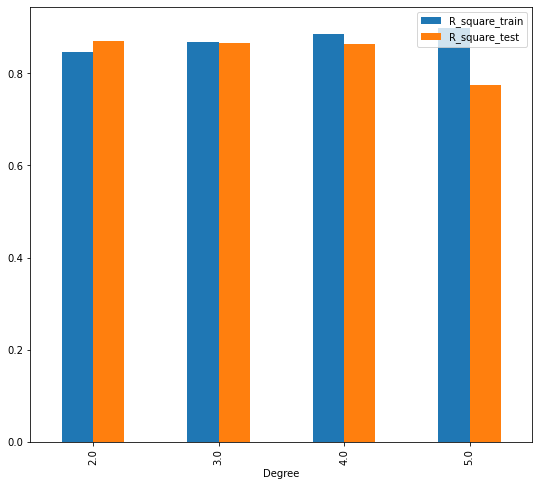

In [167]:
import pandas as pd
import matplotlib.pyplot as mp

R.plot(x="Degree", y=['R_square_train','R_square_test'], kind="bar", figsize=(9, 8))

# print bar graph
mp.show()


By observing the above bar gragh we can clearly the polynomial regression with degree 3 is performing better in linear models. After the degree 3 it tends to overfit.